In [16]:
import pandas as pd
import numpy as np
import seaborn as sea
from pandas import read_csv
from numpy import unique
from matplotlib import pyplot

# read and load the data
fileName = "/Users/mtjen/Desktop/dsci/Churn_Train.csv"
customerDF = read_csv(fileName)

# see the head of data
customerDF.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [5]:
# check if there are any null values
isNullValues = customerDF.isnull().sum()
print(isNullValues)

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64


In [6]:
# check data types for each feature
types = customerDF.dtypes
print(types)

state                             object
account_length                   float64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages            float64
total_day_minutes                float64
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                             object
dtype: object


In [7]:
# convert nonnumerical values to numerical values
customerDF = customerDF.replace(['no', 'yes'], 
                          [0, 1])
customerDF.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0
1,HI,108.0,area_code_415,0,0,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1
2,DC,82.0,area_code_415,0,0,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1
3,HI,NaN,area_code_408,0,1,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,0
4,OH,83.0,area_code_415,0,0,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1


In [9]:
# simple statistics
customerDF.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,2832.000000,3333.000000,3333.000000,3133.000000,3133.000000,3133.000000,3133.000000,3032.000000,3133.000000,3133.000000,3133.000000,3333.000000,3133.000000,3133.000000,3032.000000,3133.000000,3133.000000,3333.000000
mean,97.321328,0.096910,0.276628,7.332589,418.947048,100.331631,30.628455,324.258872,100.128631,17.083936,201.198883,100.107711,9.054028,10.226843,4.470317,2.761752,1.561443,0.144914
std,47.874422,0.295879,0.447398,13.756056,626.315020,20.039364,9.275752,320.129372,19.899854,4.295472,50.430664,19.568609,2.269421,2.805291,2.455364,0.757396,1.315666,0.352067
min,-209.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,0.000000,0.000000,149.300000,87.000000,24.450000,170.500000,87.000000,14.140000,167.300000,87.000000,7.530000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,190.500000,101.000000,30.650000,209.900000,100.000000,17.090000,201.400000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,237.800000,114.000000,36.840000,257.550000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,2185.100000,165.000000,59.640000,1244.200000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
# look at target class balance
churnBalance = customerDF.groupby('churn').size()
print(churnBalance)

churn
0    2850
1     483
dtype: int64


<AxesSubplot:>

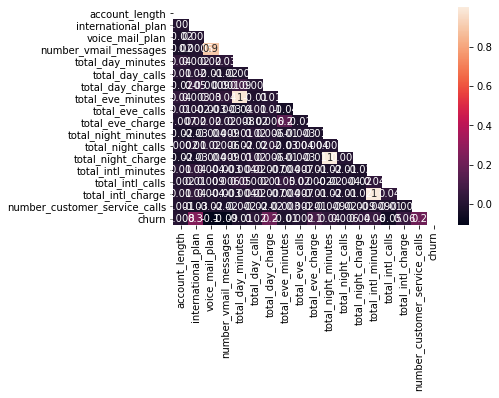

In [12]:
# use seaborn heatmap and show as a matrix
matrix = np.triu(customerDF.corr())
sea.heatmap(customerDF.corr(), annot = True, fmt = '0.1g', mask = matrix)

In [13]:
# numerical representation of correlation
customerDF.corr(method = 'pearson')

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.001486,-0.016503,-0.024292,0.039861,0.010099,-0.017361,0.044132,0.012456,-0.006875,-0.024634,0.000225,-0.024632,0.013803,0.002017,0.013827,0.001093,0.007504
international_plan,0.001486,1.000000,0.006006,0.000543,0.002218,0.018227,0.052517,0.003281,0.001975,0.015289,-0.030886,0.012451,-0.030904,0.039241,0.014202,0.039179,-0.029636,0.259852
voice_mail_plan,-0.016503,0.006006,1.000000,0.898813,0.021743,-0.013137,-0.000913,0.026618,-0.003199,0.022507,-0.004041,0.015553,-0.004065,0.003791,0.008611,0.003833,-0.017151,-0.102148
number_vmail_messages,-0.024292,0.000543,0.898813,1.000000,0.032198,-0.017955,0.001375,0.037489,-0.003031,0.016848,0.008688,0.006403,0.008666,-0.003024,0.005841,-0.003036,-0.021823,-0.094806
total_day_minutes,0.039861,0.002218,0.021743,0.032198,1.000000,-0.007066,0.085996,0.984068,-0.039625,0.007973,-0.010320,-0.023730,-0.010346,-0.003705,0.049096,-0.003668,-0.001934,-0.013031
total_day_calls,0.010099,0.018227,-0.013137,-0.017955,-0.007066,1.000000,0.007178,-0.011371,0.013673,-0.015520,0.018255,-0.017737,0.018248,0.022620,0.001861,0.022712,-0.019913,0.019337
total_day_charge,-0.017361,0.052517,-0.000913,0.001375,0.085996,0.007178,1.000000,0.011388,0.014716,0.005644,0.006071,0.024047,0.006048,-0.007459,0.010836,-0.007411,-0.018828,0.203231
total_eve_minutes,0.044132,0.003281,0.026618,0.037489,0.984068,-0.011371,0.011388,1.000000,-0.041320,0.164316,-0.013678,-0.025288,-0.013704,-0.004367,0.049135,-0.004349,-0.002751,-0.011928
total_eve_calls,0.012456,0.001975,-0.003199,-0.003031,-0.039625,0.013673,0.014716,-0.041320,1.000000,-0.015411,-0.003274,0.004325,-0.003246,0.007207,0.021037,0.007170,0.002229,0.001964
total_eve_charge,-0.006875,0.015289,0.022507,0.016848,0.007973,-0.015520,0.005644,0.164316,-0.015411,1.000000,-0.014501,0.003755,-0.014513,-0.011566,0.000245,-0.011606,-0.010224,0.098256


In [15]:
# skew for each feature
customerDF.skew()

account_length                  -1.168594
international_plan               2.726332
voice_mail_plan                  0.999140
number_vmail_messages            1.285841
total_day_minutes                2.203279
total_day_calls                 -0.125103
total_day_charge                -0.027607
total_eve_minutes                2.089711
total_eve_calls                 -0.062598
total_eve_charge                 0.002546
total_night_minutes              0.006069
total_night_calls                0.032500
total_night_charge               0.006017
total_intl_minutes              -0.249428
total_intl_calls                 1.323692
total_intl_charge               -0.249691
number_customer_service_calls    1.068860
churn                            2.018356
dtype: float64

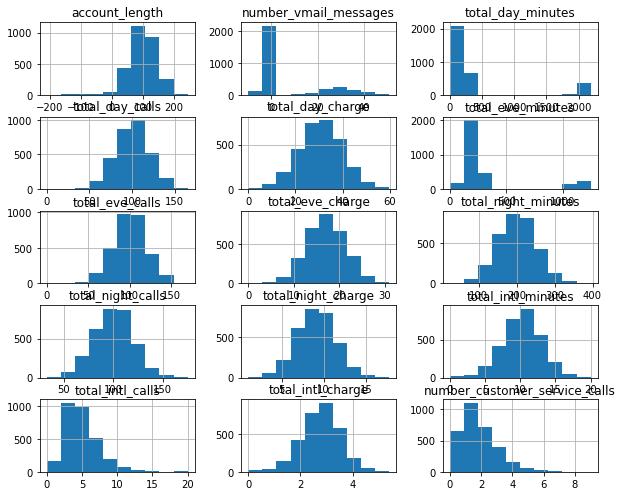

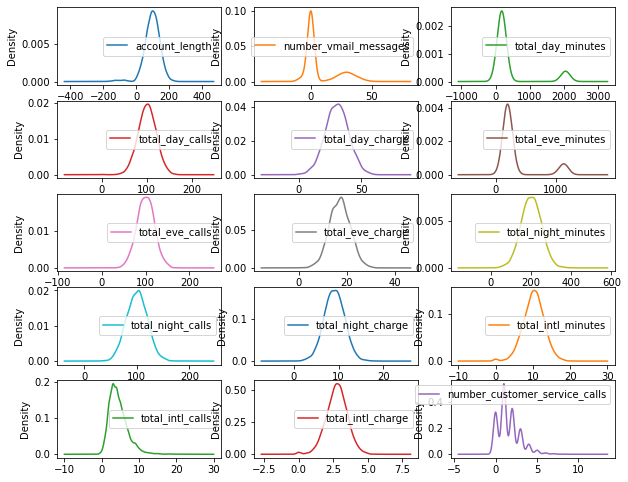

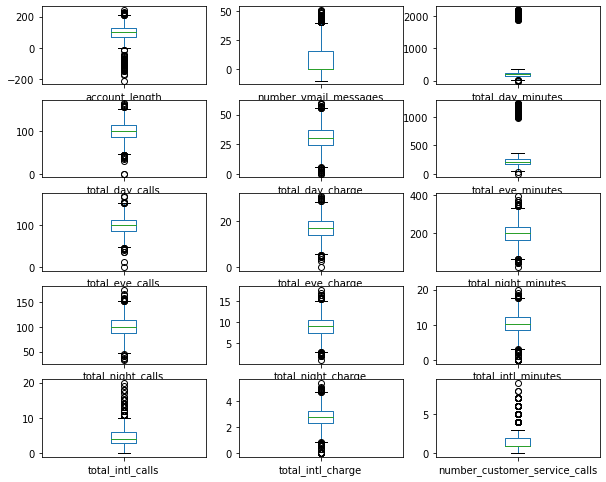

In [17]:
# visualization

# figure out distribution of variables
histogram = customerDF.hist(layout = (6,3), figsize = (10,10))

# density plot distribution
density = customerDF.plot(kind = 'density', layout = (6,3), subplots = True, 
                          sharex = False, figsize = (10,10))

# find outliers
box = customerDF.plot(kind = 'box', layout = (6,3), subplots = True, 
                      sharex = False, sharey = False, figsize = (10,10))

pyplot.show()